# New code version

In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
# from scipy.fft import irfft,rfft,rfftn,irfftn,fftn,ifftn,fft,ifft,fft2,rfft2
import itertools
from math import pi
# from orbithunter.glue import *
import matplotlib.pyplot as plt
from scipy.fft import rfft, irfft
from functools import lru_cache
from orbithunter.arrayops import swap_modes
%matplotlib inline
import time
import pandas as pd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
test = read_h5('OrbitKS_L37p297_T79p778.h5', directory='local')

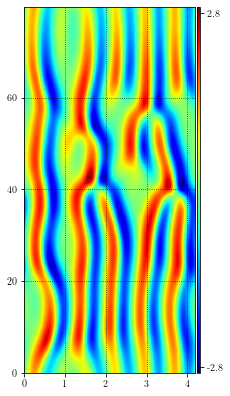

In [3]:
test2 = rediscretize(test, newN=64, newM=32)
test2.plot()

In [4]:
test2.residual()

7.670753924401113

In [5]:
import time

In [6]:
cdict = {1:'success', 0:'failure', 2:'success'}

method='adj'
t0 = time.time()
result = converge(test2, method=method, tol=test2.residual()/100., max_iter=100)
t1 = time.time()
print(method+' resulted in '+cdict[result.exit_code]+' and took {} seconds'.format(t1-t0))
print('The residual of '+method+' was {}'.format(result.orbit.residual()))

adj resulted in success and took 0.20182037353515625 seconds
The residual of adj was 0.0006611885978838498


In [7]:
cdict = {1:'success', 0:'failure'}
res, tim = [], []
for method in ['nelder-mead', 'powell', 'cg', 'bfgs', 'newton-cg', 'l-bfgs-b','tnc']:
    t0 = time.time()
    result = converge(test2, method=method, tol=test2.residual()/10., options={'maxiter':10})
    t1 = time.time()
    print(method+' resulted in '+cdict[result.exit_code]+' and took {} seconds'.format(t1-t0))
    print('The residual of '+method+' was {}'.format(result.orbit.residual()))
    res.append(result.orbit.residual())
    tim.append(t1-t0)

nelder-mead resulted in failure and took 1.5092689990997314 seconds
The residual of nelder-mead was 7.627870501132152
powell resulted in success and took 19.020095586776733 seconds
The residual of powell was 0.080906993210022
cg resulted in success and took 0.04995465278625488 seconds
The residual of cg was 0.24903425856991238
bfgs resulted in failure and took 0.7056851387023926 seconds
The residual of bfgs was 4.518372943743926
newton-cg resulted in success and took 0.00799107551574707 seconds
The residual of newton-cg was 0.37192367101268375
l-bfgs-b resulted in success and took 0.02697587013244629 seconds
The residual of l-bfgs-b was 4.334974466162225
tnc resulted in failure and took 0.022979736328125 seconds
The residual of tnc was 7.670753924401113


In [8]:
mlist =  ['nelder-mead', 'powell', 'cg', 'bfgs', 'newton-cg', 'l-bfgs-b','tnc']

In [9]:
df = pd.DataFrame(np.array([res, tim, 10*np.ones(7)]).transpose().reshape(-1,3),
                  index=mlist, columns=['residual', 'time', 'maxiter'])
df.loc[:, 'efficiency'] = 1.0/ (df.residual * df.time)

In [10]:
df

,residual,time,maxiter,efficiency
nelder-mead,7.627871,1.509269,10.0,0.086862
powell,0.080907,19.020096,10.0,0.649832
cg,0.249034,0.049955,10.0,80.383139
bfgs,4.518373,0.705685,10.0,0.313622
newton-cg,0.371924,0.007991,10.0,336.465814
l-bfgs-b,4.334974,0.026976,10.0,8.551415
tnc,7.670754,0.022980,10.0,5.673054


In [11]:
cdict = {1:'success', 0:'failure', 2:'success'}
res, tim = [], []
for method in ['adj', 'nelder-mead', 'powell', 'cg', 'bfgs', 'newton-cg', 'l-bfgs-b','tnc']:
    t0 = time.time()
    result = converge(test2, method=method, tol=test2.residual()/100., max_iter=100, options={'maxiter':100})
    t1 = time.time()
    print(method+' resulted in '+cdict[result.exit_code]+' and took {} seconds'.format(t1-t0))
    print('The residual of '+method+' was {}'.format(result.orbit.residual()))
    res.append(result.orbit.residual())
    tim.append(t1-t0)

adj resulted in success and took 0.15020322799682617 seconds
The residual of adj was 0.0006611885978838498
nelder-mead resulted in failure and took 8.411875486373901 seconds
The residual of nelder-mead was 7.618885976612613
powell resulted in success and took 86.512535572052 seconds
The residual of powell was 0.009156921017020392
cg resulted in success and took 0.10909771919250488 seconds
The residual of cg was 0.009780329165529431
bfgs resulted in failure and took 0.7672247886657715 seconds
The residual of bfgs was 4.518372943743926
newton-cg resulted in success and took 0.0069925785064697266 seconds
The residual of newton-cg was 0.37192367101268375
l-bfgs-b resulted in success and took 0.023977994918823242 seconds
The residual of l-bfgs-b was 0.017235918319132088
tnc resulted in success and took 0.18805932998657227 seconds
The residual of tnc was 0.0075508363511124265


In [17]:
100*np.ones(7)

array([100., 100., 100., 100., 100., 100., 100.])

In [14]:
 pd.DataFrame(np.array([res, tim, ]).transpose().reshape(-1,3),
                  index=mlist, columns=['residual', 'time', 'maxiter'])

ValueError: Shape of passed values is (1, 3), indices imply (7, 3)

In [12]:
df2 = pd.DataFrame(np.array([res, tim, 100*np.ones(7)]).transpose().reshape(-1,3),
                  index=mlist, columns=['residual', 'time', 'maxiter'])
df2.loc[:, 'efficiency'] = 1.0/ (df2.residual * df2.time)

ValueError: Shape of passed values is (1, 3), indices imply (7, 3)

In [ ]:
df2

In [ ]:
1.0/(result.orbit.residual()*(t1-t0))

In [66]:
cdict = {1:'success', 0:'failure', 2:'success'}

method='adj'
t0 = time.time()
result = converge(test2, method=method, tol=test2.residual()/100., max_iter=100)
t1 = time.time()
print(method+' resulted in '+cdict[result.exit_code]+' and took {} seconds'.format(t1-t0))
print('The residual of '+method+' was {}'.format(result.orbit.residual()))

adj resulted in success and took 0.15485668182373047 seconds
The residual of adj was 0.0006611885978838498


In [2]:
large_orbit = read_h5('OrbitKS_L607p845_T652p276.h5')

In [4]:
test = rediscretize(large_orbit, newN=64, newM=64)

In [15]:
J = test.jacobian()

In [9]:
JL = test.jacobian(preconditioning='left')

In [10]:
JR = test.jacobian(preconditioning='right')

In [ ]:
newt_large_orbit = converge(large_orbit, method='lstsq', verbose=True)

Starting lstsq numerical method. Initial residual 0.02241617960868039


# Gaussian spectrum

In [14]:
np.ones([10,10]).mean()

1.0

In [12]:
?np.mean

In [7]:
test = None
print(type(test))
if test == 'hey':
    print('hi')

<class 'NoneType'>


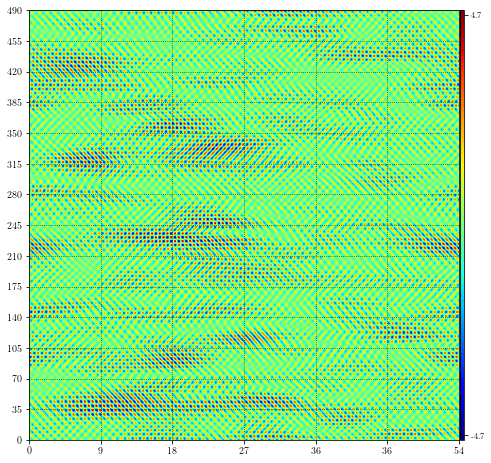

In [109]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(T/10)

sigma_time = 10
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

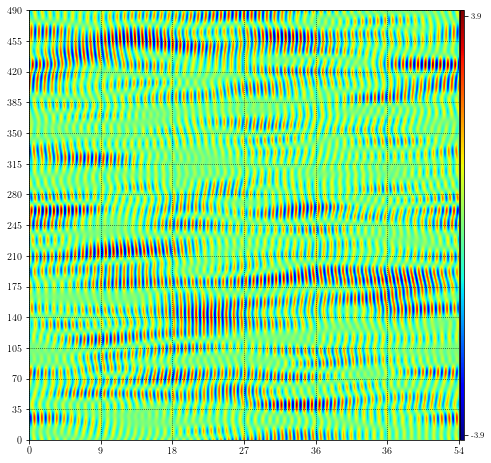

In [110]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 10
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

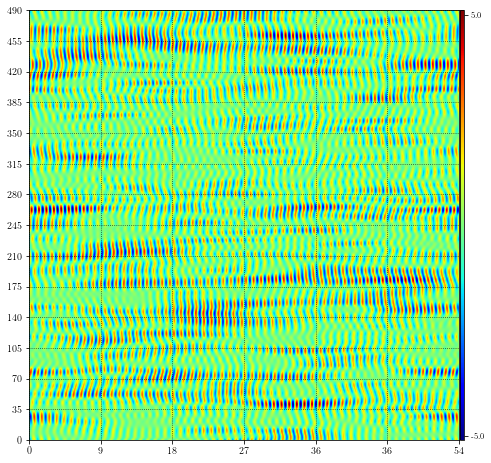

In [111]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

sigma_time = 20
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

In [ ]:
np.tile(np.sqrt((np.abs(jrange-sms)/sms)),(n,1))
(np.sign((j)-(sms))*((j)-(sms)))
np.sqrt((np.abs(j-sms)/sms))
((2*pi*sms/L)**2-(2*pi*sms/L)**4) -(((2*pi*j/L)**2-(2*pi*j/L)**4))

In [ ]:
        spatial_range=np.arange(1,m+1)
        spatial_spectrum_tmp = -1.*np.abs(spatial_range-sms)
        spatial_spectrum = np.tile(spatial_spectrum_tmp,(n,1))
        spatial_spectrum = np.concatenate((spatial_spectrum,spatial_spectrum),axis=1)
        spatially_smoothed = np.multiply(np.exp(spatial_spectrum), st_mat)

        temporal_range=np.reshape(np.arange(0,int(N//2)),[int(N//2),1])
        temporal_range_nozero = np.reshape(temporal_range[1:],[int(N//2)-1,1])
        temporal_spectrum_tmp = -1.*(temporal_range-tms)**2
        temporal_spectrum_tmp = np.tile(temporal_spectrum_tmp,(1,m))
        temporal_spectrum_nozero_tmp = -1.*(temporal_range_nozero-tms)**2
        temporal_spectrum_nozero_tmp = np.tile(temporal_spectrum_nozero_tmp,(1,m))
        temporal_spectrum = np.concatenate((np.concatenate((temporal_spectrum_tmp,temporal_spectrum_tmp),axis=1)
                                            ,np.concatenate((temporal_spectrum_nozero_tmp,temporal_spectrum_nozero_tmp),axis=1)),axis=0)

        spatiotemporal_spectrum = np.multiply(np.exp(temporal_spectrum),spatially_smoothed)

        modes_smooth = np.reshape(spatiotemporal_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(modes_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])

In [186]:
    if scale_type == 'gaussian':
        sigma_time = 2
        sigma_space = 5
        tms=2
        time = np.tile(np.reshape(np.concatenate((np.arange(0,int(N/2)),np.arange(1,int(N/2))),axis=0),[n,1]),(1,M-2))
        space = np.tile(np.reshape(np.concatenate((np.arange(1,m+1),np.arange(1,m+1)),axis=0),[1,M-2]),(n,1))
        spatiotemporal_gaussian = 1./np.sqrt(2*pi**2*sigma_space**2*sigma_time**2)*np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))
        spacetime_spectrum = np.multiply(spatiotemporal_gaussian, st_mat)
        modes_smooth = np.reshape(spacetime_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(modes_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    elif scale_type=='modulated':

    elif scale_type =='random':
        u = np.random.randn(M*N)
        renormed_uu = np.reshape(amplitude*u/np.max(np.abs(u)),[N,M])
    else:
        tms = 2
        jrange = np.arange(1,m+1)
        spacetime_mollifier_grid=-1*np.tile(np.sqrt((np.abs(jrange-sms)/sms)),(n,1))
        spacetime_mollifier_grid = np.concatenate((spacetime_mollifier_grid,spacetime_mollifier_grid),axis=1)
        mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        modes_smooth = np.reshape(smoothed, [(M-2) * n, 1])
        u_vec = ifft_(modes_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])

NameError: name 'scale_type' is not defined

In [ ]:
random_modes

In [87]:
OrbitKS(state=random_modes, state_type='modes', T=50, L=50)

TypeError: Object of type int32 is not JSON serializable

In [12]:
import glob

In [60]:
for g in glob.glob('C:\\Users\\matt\\Desktop\\gudorf\\KS\\python\\data_and_figures\\**\\*.h5', recursive=True):
    print(g.split('data_and_figures')[-1])

In [120]:
sr_orbit = read_h5("C:\\Users\\Matt\\Desktop\\orbithunter_test_data\\none_000_021.h5", data_format='kstori', state_type='field')
orbit = OrbitKS(state=sr_orbit.state[-1,:].reshape(1,-1), state_type=sr_orbit.state_type, T=sr_orbit.T, L=sr_orbit.L)

In [121]:
sr_orbit.state_type

'field'

In [123]:
orbit.convert(to='modes')

OrbitKS({"state_type": "modes", "N": 1, "M": 16, "T": "1.88e+01", "L": "2.78e+01", "S": "0.e+00"})

In [96]:
sr_orbit = read_h5("C:\\Users\\Matt\\Desktop\\orbithunter_test_data\\none_000_021.h5", data_format='kstori')
orbit = OrbitKS(state=sr_orbit.state, state_type=sr_orbit.state_type, T=sr_orbit.T, L=sr_orbit.L+0.01).convert(to='modes')
self = orbit.copy()
other = orbit.spatiotemporal_mapping()

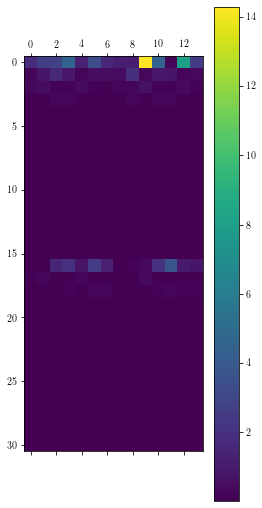

In [100]:
plt.matshow(np.abs(orbit.convert(to='modes').state))
plt.colorbar()

In [97]:
plt.matshow(orbit.convert(to='modeN = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 10
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()').state)

SyntaxError: EOL while scanning string literal (<ipython-input-97-6a65eb83c1b5>, line 1)

In [3]:
eqva_orbit = read_h5('EquilibriumOrbitKS_L11p436.h5', data_format='kstori', directory='local', state_type='field')
reqva_orbit = read_h5('reqva_L27p39.h5', data_format='kstori',  directory='local', state_type='field')

In [10]:
len('testestestes.'.split('.'))

2

In [6]:
eqva_orbit.to_h5(filename='test.h5', directory='')

In [9]:
?fig.add_axes

In [37]:
?isinstance

In [39]:
isinstance(None, type(None))

True

In [129]:
orbit = read_h5("C:\\Users\\Matt\\Desktop\\orbithunter_test_data\\none_000_021.h5", data_format='kstori', state_type='field')

In [130]:
space_modes_complex = rfft(orbit.convert(to='field').state, norm='ortho', axis=1)[:, 1:-1]
spatial_modes = np.concatenate((space_modes_complex.real, space_modes_complex.imag), axis=1)

In [133]:
rfft(orbit.convert(to='field').state, norm='ortho', axis=1).shape

(32, 9)

In [116]:
orbit_s_modes = orbit.convert(to='s_modes')
complex_modes = orbit_s_modes.state[:, :-orbit_s_modes.m] + 1j * orbit_s_modes.state[:, -orbit_s_modes.m:]
z = np.zeros([s_modes.N, 1])
space_modes = np.concatenate((z, complex_modes, z), axis=1)
# this divides by 64, the new value of m. were divided by 1/sqrt(16) on the forward, this means that it should be 1/sqrt(16)
field = irfft(space_modes, axis=1)
(np.sqrt(16)*field).max()

2.6882830713723984

In [151]:
orbit_s_modes = orbit.convert(to='s_modes')
complex_modes = orbit_s_modes.state[:, :-orbit_s_modes.m] + 1j * orbit_s_modes.state[:, -orbit_s_modes.m:]
z = np.zeros([s_modes.N, 1])
space_modes = np.concatenate((z, complex_modes, z), axis=1)
# this divides by 64, the new value of m. were divided by 1/sqrt(16) on the forward, this means that it should be 1/sqrt(16)
field = irfft(space_modes, norm='ortho', axis=1)
unpadded_max = (field).max()
unpadded_max

2.6882830713723984

In [166]:
orbit.convert(to='s_modes')

OrbitKS({"state_type": "s_modes", "N": 32, "M": 16, "T": "1.88e+01", "L": "2.78e+01", "S": "0.e+00"})

In [169]:
(orbit.mode_padding(dimension='space', size=64).convert(to='s_modes')-orbit.convert(to='s_modes').mode_padding(dimension='space', size=64)).norm()

3.782213978508417e-15

In [198]:
orbit.mode_padding(dimension='space', size=64)

OrbitKS({"state_type": "field", "N": 32, "M": 64, "T": "1.88e+01", "L": "2.78e+01", "S": "0.e+00"})

In [72]:
orbit_s_modes = orbit.convert(to='s_modes').mode_padding(dimension='space', size=64)
complex_modes = orbit_s_modes.state[:, :-orbit_s_modes.m] + 1j * orbit_s_modes.state[:, -orbit_s_modes.m:]
# Re-add the zeroth and Nyquist spatial frequency modes (zeros) and then transform back
z = np.zeros([orbit_s_modes.N, 1])
space_modes = np.concatenate((z, complex_modes, z), axis=1)
field = irfft(space_modes, axis=1)
field.max() * 64 / np.sqrt(16)

2.757393878895269

In [15]:
def test_if_derivatives_are_equal(orbit1, orbit2):
    test_values = {}
    test_values['dt'] = (orbit1.dt(return_modes=True) -orbit2.dt(return_modes=True)).sum()
    test_values['dx2']=(orbit1.dx(power=2, return_modes=True) -orbit2.dx(power=2, return_modes=True)).sum()
    test_values['dx4'] = (orbit1.dx(power=4,return_modes=True) -orbit2.dx(power=4,return_modes=True)).sum()
    test_values['cm'] = (orbit1.comoving_mapping_component(return_modes=True)
                        - orbit2.comoving_mapping_component(return_modes=True)).sum()
    
    orbit1_field = orbit1.convert(to='field')
    orbit2_field = orbit2.convert(to='field')
    test_values['pse'] = (orbit1_field.nonlinear(orbit1_field, return_modes=True)
                         -orbit2_field.nonlinear(orbit2_field, return_modes=True)).sum()
    return test_values

In [85]:
np.sign(-5.)

-1.0

In [162]:
st = reqva.state + dorbit2.state
t = reqva.T + dorbit2.T
l = reqva.L + dorbit2.L
s = reqva.S + dorbit2.S
manual_increment = reqva.__class__(state=st, state_type='modes', T=t, L=l, S=s, N=reqva.N)

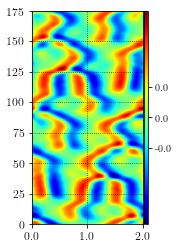

Starting lstsq numerical method. Initial residual 0.0019471593337781082
0
Converged. exiting with residual 3.785237423627222e-18


In [80]:
orbit = read_h5("C:\\Users\\Matt\\Desktop\\orbithunter_test_data\\ppo_L21p74_T95p23.h5", data_format='kstori')
orbit.plot(fundamental_domain=False)
orbit.residual()
result = converge(orbit, method='lstsq', atol=10**-14, verbose=True)

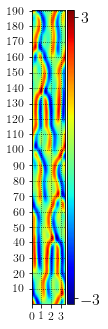

Starting lstsq numerical method. Initial residual 0.0019471593337781078
0
Converged. exiting with residual 3.7852378724652415e-18


TypeError: jacobian() got an unexpected keyword argument 'fixedparams'

In [17]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbit-tmp\\")
from orbithunter import *
import numpy as np
# from scipy.fft import irfft,rfft,rfftn,irfftn,fftn,ifftn,fft,ifft,fft2,rfft2
import itertools
from math import pi
import matplotlib.pyplot as plt
from scipy.fft import rfft, irfft
%matplotlib inline

orbit = read_h5("C:\\Users\\Matt\\Desktop\\orbithunter_test_data\\ppo_L21p74_T95p23.h5")
orbit.plot(fundamental_domain=False)
orbit.residual()
converge(orbit, method='lstsq', atol=10**-14, verbose=True)

# np.linalg.norm(orbit.spacetime_ifft().spacetime_fft().state - orbit.state)
# np.sum(np.abs(np.dot(orbit.jacobian()[:, :-2], orbit.spatiotemporal_mapping().state.ravel())))
# np.dot(orbit.jacobian()[:, :-2], orbit.spatiotemporal_mapping().state.ravel())

from scipy.linalg import lstsq

def _state_vector_to_orbit(orbit, correction_vector, parameter_constraints=(False,False,False), **kwargs):
    """
    :param orbit:
    :param correction_vector:
    :param preconditioning:
    :param parameter_constraints:
    :param kwargs:
    :return:
    """
    correction_vector = correction_vector.reshape(-1, 1)
    mode_shape, mode_size = orbit.state.shape, orbit.state.size
    d_modes = correction_vector[:mode_size]
    # slice the changes to parameters from vector
    d_params = correction_vector[mode_size:].ravel()

    for i, constrained in enumerate(parameter_constraints):
        if constrained or (i == len(d_params)):
            d_params = np.insert(d_params, i, 0)
    dT, dL, dS = d_params
    correction_orbit = orbit.__class__(state=np.reshape(d_modes, mode_shape), state_type='modes',
                                       T=dT, L=dL, S=dS)
    return correction_orbit

parameter_constraints = (False,False,False)
A = orbit.jacobian(fixedparams=parameter_constraints)
b = -1.0 * orbit.spatiotemporal_mapping().state.ravel()
correction_tuple = lstsq(A, b.reshape(-1, 1))
correction_vector = correction_tuple[0]

dorbit = _state_vector_to_orbit(orbit, correction_vector, fixedparams=parameter_constraints)

# To avoid redundant function calls, store optimization variables using
# clunky notation.
next_orbit = orbit.increment(dorbit, stepsize=1)
next_residual = next_orbit.residual()
next_residual

dorbit.state.shape

dorbit.to_h5('ShiftReflectionOrbitKS_old_dx.h5')
next_orbit.to_h5('ShiftReflectionOrbitKS_old_next_orbit.h5')

In [83]:
result

 exit_code: 1
     orbit: ShiftReflectionOrbitKS({"state_type": "modes", "N": 64, "M": 32, "T": "1.90e+02", "L": "5.e+01", "S": "0.e+00"})

# Caching with class methods.

Testing cases for class method caching. Classmethod on both method in test and method in parent class. 

Return elementwise_dx() by passing arguments, i.e. without instantiation. 


See if calling the class method once and then timing it with another class member works.

See if calling the classmethod, which instantiates a new class instance can be shared. 

In [ ]:
class TestOrbit():
    @classmethod
    @lru_cache(maxsize=None)
    def elementwise_dx(self, L, N, M, m):
        qk = ((2 * pi * self.M / self.L) * np.fft.fftfreq(self.M)[1:self.m+1]).reshape(1, -1)
        qk_vec = np.concatenate((qk, -qk), axis=1)
        return np.tile(qk_vec, (self.N-1, 1))

In [ ]:
class CacheTestOrbit():
    
    @classmethod
    @lru_cache(maxsize=None)
    def cached_function_call(self, L, N, M, m):
        qk = ((2 * pi * M / L) * np.fft.fftfreq(M)[1:m+1]).reshape(1, -1)
        qk_vec = np.concatenate((qk, -qk), axis=1)
        return np.tile(qk_vec, (N-1, 1)) 
    
    @classmethod
    @lru_cache(maxsize=None)
    def cached_function_call(self, L, N, M, m):
        qk = ((2 * pi * M / L) * np.fft.fftfreq(M)[1:m+1]).reshape(1, -1)
        qk_vec = np.concatenate((qk, -qk), axis=1)
        return np.tile(qk_vec, (N-1, 1)) 
    
    @classmethod
    @lru_cache(maxsize=None)
    def cached_elementwise_with_instantiation(self, orbit):
        return RelativeOrbitKS(state=orbit.state,state_type=orbit.state_type, L=orbit.L,
                               N=orbit.N, M=orbit.M, m=orbit.m).elementwise_dx()
        
    @classmethod
    @lru_cache(maxsize=None)
    def cached_elementwise_without_instantiation(self, orbit):
        return orbit.elementwise_dx()

First test the caching by calling an instantiated instance, then class generator, then different class instance. 

In [ ]:
(L, N, M, m) = rpo_test.L, rpo_test.N, rpo_test.M, rpo_test.m

In [ ]:
c = CacheTestOrbit()
%timeit c.cached_elementwise_without_instantiation(L,N,M,m)

In [ ]:
%%timeit CacheTestOrbit().cached_elementwise_without_instantiation(rpo_test)
orbit
rpo_test

In [ ]:
c = CacheTestOrbit()
%timeit c.cached_elementwise_without_instantiation(rpo_test)

In [ ]:
# orbit = rpo_test
c = CacheTestOrbit()
%timeit c.cached_elementwise_with_instantiation(rpo_test)

In [ ]:
%timeit CacheTestOrbit.cached_elementwise_without_instantiation(rpo_test)

In [ ]:
# orbit = rpo_test
%timeit CacheTestOrbit.cached_elementwise_with_instantiation(rpo_test)

In [ ]:
orbit = rpo_test
c = CacheTestOrbit()
%timeit c.cached_elementwise_with_instantiation(orbit)

In [ ]:
orbit = rpo_test
%timeit CacheTestOrbit.cached_elementwise_with_instantiation(orbit)

In [ ]:
orbit = rpo_test
%timeit = CacheTestOrbit().cached_elementwise_with_instantiation(RelativeOrbitKS(state=orbit.state,state_type=orbit.state_type, L=orbit.L,
                               N=orbit.N, M=orbit.M, m=orbit.m))

In [ ]:
orbit = rpo_test

In [ ]:
    @classmethod
    @lru_cache(maxsize=None)
    def wave_vector(self, orbit):
        return  super().wave_vector()
    

In [ ]:
np.linalg.norm(np.ravel(self.elementwise_dx()))

# Actual orbit caching.

Note, do not want to cache the actual jacobian, mapping, rmatvec functions because this will emulate the adjoint descent process, for instance. Only want to see the effect of caching elementwise and frequency vector functions. Want to also check performance of clean vs. current coding implementations for those functions. 

Classmethod is ok, but because caching happens with respect to immutable types, need to pass parameters instead of class instances. The classmethod does not have knowledge of an instance's attributes, even if called as instance.classmethod(). need to pass it immutable 

# need to check
whether or not caching an classmethod that doesn't take arguments will return the same value even if the computation would be different. 


Why am I trying to do class methods instead of functions?

In [ ]:


defect_down = RelativeOrbit(state=defect.convert(to='field').state, statetype='field', T=defect.T, L=defect.L, S=defect.S)
exit_code = 1
result = converge(defect_down, fixedparams=(False, False, False), verbose=True)
defect_down = result.Orbit

while exit_code == 1:
    # print(wiggle_freeboundary.residual())
    defect_down.L -= 0.01
    # print(wiggle_freeboundary.residual())
    result = converge(defect_down,  fixedparams=(False,True,False), verbose=True)
    exit_code = result.exit_code
    if exit_code == 1:
        defect_down = result.Orbit
        defect_down.plot(save=True)
defect_down.plot(save=True)

In [ ]:
defect_up = RelativeOrbit(state=defect.convert(to='field').state, statetype='field', T=defect.T, L=defect.L, S=defect.S)
exit_code = 1
result = converge(defect_up, fixedparams=(False, False, False), verbose=True)
defect_up = result.Orbit

while exit_code == 1:
    defect_up.L += 2
    print(defect_up.L)
    result = converge(defect_up,  fixedparams=(False,False,False), verbose=True)
    exit_code = result.exit_code
    if exit_code == 1:
        defect_up = result.Orbit
        print(result.Orbit.L)
        defect_up.plot()
defect_up.plot()

In [ ]:
result = converge(rediscretize(a, newN=32, newM=32), fixedparams=(False, False, False), verbose=True)
wiggle = result.Orbit

In [ ]:
wiggle.plot()

In [ ]:
wiggle_up = Orbit(state=wiggle.convert(to='field').state, statetype='field', T=wiggle.T, L=wiggle.L)
exit_code = 1

In [ ]:
wiggle_up.N

In [ ]:
niter=0
while exit_code == 1:
    wiggle_up.L += 0.01
    result = converge(wiggle_up, method='lstsq', fixedparams=(False, True, False), verbose=False)
    exit_code = result.exit_code
    
    if exit_code == 1:
        niter+=1
        wiggle_up = result.Orbit
        print(result.Orbit.L)
        if niter % 5 == 0:
            wiggle_up.plot()
        # wiggle_freeboundary.plot()
wiggle_up.plot()

In [ ]:
wiggle_up = Orbit(state=wiggle.convert(to='field').state, statetype='field', T=wiggle.T, L=wiggle.L)
exit_code = 1

In [ ]:
while exit_code == 1:
    # print(wiggle_freeboundary.residual())
    wiggle_up.L += 0.5
    # print(wiggle_freeboundary.residual())
    result = converge(wiggle_up, verbose=True)
    exit_code = result.exit_code
    if exit_code == 1:
        wiggle_up = result.Orbit
        print(result.Orbit.L)
        wiggle_up.plot()
        
print(result.Orbit.L)
wiggle_up.plot()

In [ ]:
result = converge(wiggle, fixedparams=(False, True, False), verbose=True)
wiggle = result.Orbit

In [ ]:
wiggle_freeboundary = RelativeOrbit(state=wiggle.state, statetype=wiggle.statetype, T=wiggle.T, L=wiggle.L, S=0)
exit_code = 1

wiggle_freeboundary.S = float(wiggle_freeboundary.calculate_shift())



while exit_code == 1:
    wiggle_freeboundary.L -= 0.01
    result = converge(wiggle_freeboundary, fixedparams=(False, True, False), verbose=True)
    exit_code = result.exit_code
    print(exit_code, result.Orbit.L)
    if exit_code == 1:
        wiggle_freeboundary = result.Orbit

In [ ]:
# defect_down = rediscretize(r, newN=32, newM=32)#.to_fundamental_domain()
defect_down = defect
# defect = RelativeOrbit(state=wiggle.state, statetype=wiggle.statetype, T=wiggle.T, L=wiggle.L, S=0)
exit_code = 1
# wiggle_freeboundary.S = float(wiggle_freeboundary.calculate_shift())

while exit_code == 1:
    defect_down.L -= 0.1
    result = converge(defect_down, method='lstsq', fixedparams=(False, True, False),  verbose=True)
    exit_code = result.exit_code
    if exit_code == 1:
        defect_down = result.Orbit

In [ ]:
defect_up = rediscretize(r, newN=32, newM=32)#.to_fundamental_domain()
# wiggle_freeboundary = RelativeOrbit(state=wiggle.state, statetype=wiggle.statetype, T=wiggle.T, L=wiggle.L, S=0)
exit_code = 1
while exit_code == 1:
    defect_down.L += 0.1
    result = converge(defect_down, fixedparams=(False, False, False),  verbose=True)
    exit_code = result.exit_code
    if exit_code == 1:
        defect_down = result.Orbit

In [ ]:
result

In [ ]:
result = converge(wiggle_freeboundary, fixedparams=(False, True, False), method='lstsq', verbose=True)


In [ ]:
wiggle_freeboundary.plot(fundamental_domain=False)

In [ ]:
def draw_nodal_lines(orbit, epsilon=0.2):
    orbit_dx_field = orbit.dx().convert(to='field').state
    nodal = np.where(np.abs(orbit_dx_field)< epsilon) 
    not_nodal = np.where(np.abs(orbit_dx_field) >= epsilon)
    orbit_dx_field[nodal]=1
    orbit_dx_field[not_nodal]=None
    
    return orbit_dx_field

In [ ]:
# anew = rediscretize(a, newN=256, newM=256)
# rnew = rediscretize(r, newN=256, newM=256)
# enew = rediscretize(e, newN=256, newM=256)
# anew.plot(fundamental_domain=False, padding=False)
# rnew.comoving_transformation().plot(fundamental_domain=False, padding=False)

In [ ]:
rnode = draw_nodal_lines(rnew.to_fundamental_domain(), epsilon=0.1)
rnode_halfcell = np.roll(rnode, rnode.shape[1]//2, axis=1)

fig = plt.figure()
plt.imshow(rnode, origin='lower')
_ = plt.show()

fig = plt.figure()
plt.imshow(rnode_halfcell, origin='lower')
_ = plt.show()

In [ ]:
wiggle_freeboundary

In [ ]:
anode = draw_nodal_lines(anew, epsilon=0.1)
anode_halfcell = np.roll(anode, anode.shape[1]//2, axis=1)

fig = plt.figure()
plt.imshow(anode, origin='lower')
_ = plt.show()

fig = plt.figure()
plt.imshow(anode_halfcell, origin='lower')
_ = plt.show()

In [ ]:
fig = plt.figure()
plt.imshow(draw_nodal_lines(rediscretize(a, newN=256, newM=256)))
_ = plt.show()

In [ ]:
Orbit(state=draw_nodal_lines(a), statetype='field',

In [ ]:
e.convert(to='field').state.shape

In [ ]:
e.convert(to='modes').state.shape

In [ ]:
modes = rfft(spatial_modes, norm='ortho', axis=0)
modes_real = modes.real[:-1, -aOrbit.m:]
modes_imag = modes.imag[1:-1, -aOrbit.m:]
anti_spacetime_modes = np.concatenate((modes_real, modes_imag),axis=0)

In [ ]:
# PPO
modes = rfft(spatial_modes, norm='ortho', axis=0)
modes_real = modes.real[:-1, :-Orbit.m] + modes.real[:-1, -Orbit.m:]
modes_imag = modes.imag[1:-1, :-Orbit.m] + modes.imag[1:-1, -Orbit.m:]
ppo_spacetime_modes = np.concatenate((modes_real, modes_imag),axis=0)

In [ ]:
# Orbit, RelativeOrbit
modes = rfft(spatial_modes, norm='ortho', axis=0)
modes_real = modes.real[:-1, :] 
modes_imag = modes.imag[1:-1, :]
spacetime_modes = np.concatenate((modes_real, modes_imag),axis=0)

In [ ]:
mat_tmp = irfft(np.eye(Orbit.N//2+1), norm='ortho', axis=0)
time_irfft_mat = np.concatenate((mat_tmp[:,:-1], mat_tmp[:,1:-1]),axis=1)

In [ ]:
np.linalg.norm(f.transpose()-space_mat)

In [ ]:
self = Orbit
fx = (1 / np.sqrt(self.M)) * old_rfft(np.eye(self.M), axis=0)[1:self.M - 1, :]
fx_a = np.zeros([self.m, self.M], float)
fx_b = np.zeros([self.m, self.M], float)

indices = np.arange(0, self.m)
fx_a[indices, :] = fx[2 * indices, :]
fx_b[indices, :] = fx[2 * indices + 1, :]

ff = np.concatenate((fx_a, fx_b), axis=0)

In [ ]:
plt.imshow(f-space_mat)
_ = plt.show()

In [ ]:
space_real_mat = irfft(np.eye(Orbit.M//2 + 1), norm='ortho', axis=0)

space_imag_mat = irfft(1j*np.eye(Orbit.M//2 + 1), norm='ortho', axis=0)

space_mat = np.concatenate((space_real_mat[:, 1:-1], space_imag_mat[:, 1:-1]),axis=1)

space_ifft_matrix = np.kron(space_mat, np.eye(Orbit.N))

np.linalg.norm(space_ifft_matrix-Orbit.space_irfft_matrix())

In [ ]:
space_mat.shape

In [ ]:
np.eye(Orbit.M//2 + 1).shape

In [ ]:
irfft(np.eye(Orbit.M//2 + 1), norm='ortho', axis=0)

In [ ]:
fx = np.sqrt(self.M)*old_irfft(np.eye(self.M), axis=0)[:, 1:self.M-1]
fx_a = np.zeros([self.M, self.m], float)
fx_b = np.zeros([self.M, self.m], float)

indices = np.arange(0, self.m)
fx_a[:, indices] = fx[:, 2 * indices]
fx_b[:, indices] = fx[:, 2 * indices + 1]

fb = np.concatenate((fx_a, fx_b), axis=1)

In [ ]:
imag_idft_matrix = irfft(1j*np.eye((Orbit.N//2)+1), norm='ortho', axis=0)
real_idft_matrix = irfft(np.eye((Orbit.N//2)+1), norm='ortho', axis=0)
time_idft_matrix = np.concatenate((real_idft_matrix[:, :-1], imag_idft_matrix[:, 1:-1]),axis=1)
ab_time_idft_matrix = np.insert(time_idft_matrix, np.arange(time_idft_matrix.shape[0]), time_dft_matrix, axis=0)

ab_transform_formatter = np.zeros((2*Orbit.N, Orbit.N-1),dtype=int)
ab_transform_formatter[::2,1:-Orbit.n:2] = 1
ab_transform_formatter[1::2,:-Orbit.n:2] = 1
ab_transform_formatter[1::2,-Orbit.n+1::2] = 1
ab_transform_formatter[::2,-Orbit.n::2] = 1

full_time_ifft_matrix = np.kron(ab_time_idft_matrix*ab_transform_formatter, 
                                np.eye(Orbit.mode_shape[1]))

In [ ]:
ab_transform_formatter = np.zeros((Orbit.N-1, 2*Orbit.N),dtype=int)
#odd rows
ab_transform_formatter[1:-Orbit.n:2,::2] = 1
ab_transform_formatter[:-Orbit.n:2,1::2] = 1
ab_transform_formatter[-Orbit.n+1::2,1::2] = 1
ab_transform_formatter[-Orbit.n::2, ::2] = 1

full_dft_mat = rfft(np.eye(Orbit.M), norm='ortho', axis=0)
# time_real_mat = rfft(np.eye(Orbit.N//2+1), norm='ortho', axis=0)
time_dft_mat = np.concatenate((full_dft_mat[:-1, :].real, full_dft_mat[1:-1, :].imag), axis=0)
ab_time_dft_matrix = np.insert(time_dft_mat, np.arange(time_dft_mat.shape[1]), time_dft_mat, axis=1)
full_time_fft_matrix = np.kron(ab_time_dft_matrix*ab_transform_formatter, np.eye(Orbit.m))

In [ ]:
idft_mat = irfft(np.eye(Orbit.N//2 + 1), norm='ortho', axis=0)
time_idft_mat = np.concatenate((idft_mat[:, :-1].real, 
                                idft_mat[:, 1:-1].imag), axis=1)

In [ ]:
Orbit.dt_matrix().shape

In [ ]:
Orbit.dx_matrix(power=2).shape

In [ ]:
%%timeit
Orbit.dt_matrix() + Orbit.dx_matrix(power=2, statetype='modes') + Orbit.dx_matrix(power=4, statetype='modes')

In [ ]:
%%timeit
qk=Orbit.wave_vector().ravel()
dx2 = -1*np.kron(np.eye(Orbit.N-1), np.diag(qk**2))
dx4 = -1*np.kron(np.eye(Orbit.N-1), np.diag(qk**4))
jl = Orbit.dt_matrix() + dx2 + dx4

In [ ]:
idft_mat = irfft(np.eye(Orbit.M//2 + 1), norm='ortho', axis=0)[:, 1:-1]
space_idft_mat = np.concatenate((idft_mat.real, idft_mat.imag), axis=1)
space_idft_mat.shape

In [ ]:
dft_mat = rfft(np.eye(Orbit.N), norm='ortho', axis=0)
time_dft_mat = np.concatenate((dft_mat[:-1,:].real, dft_mat[1:-1,:].imag), axis=0)
ab_time_dft_mat = np.insert(time_dft_mat, 
                             np.arange(time_dft_mat.shape[1]), 
                             np.zeros([time_dft_mat.shape[0], time_dft_mat.shape[1]]),
                             axis=1)
np.kron(ab_time_dft_mat, np.eye(Orbit.m)).shape

In [ ]:
plt.imshow(ab_time_idft_mat)
plt.colorbar()
_ = plt.show()

In [ ]:
ab_time_idft_mat.shape

In [ ]:
tttt = full_time_ifft_matrix[full_time_ifft_matrix!=0]
tttt[-5:]

In [ ]:
# tmptmp = time_test[:, np.newaxis, :]


In [ ]:
shuf2 = np.tile(np.insert(np.ones(8), np.arange(8), np.zeros(8)), (32,1))
shuf1 = np.tile(np.insert(np.zeros(8), np.arange(8), np.ones(8)), (32,1))
shuffle_mat = np.insert(shuf1.reshape(32, 1, 16), np.arange(32), shuf2.reshape(32,1,16),axis=0).squeeze()
t2 = np.concatenate((shuffle_mat, shuffle_mat[:,1:]),axis=1)*tst
# shufodd = np.roll(np.insert(shuf1.reshape(16, 1, 32), np.arange(16), shuf2.reshape(16,1,32),axis=0).squeeze(),1,axis=1)
# shufodd = shufodd[:,:-1]
# shufeven = shufeven[:,:-1]

In [ ]:
# %%timeit


In [ ]:
plt.imshow(tst)
plt.colorbar()
_ = plt.show()

In [ ]:
plt.imshow(t2)
plt.colorbar()
_ = plt.show()

In [ ]:
plt.imshow((tst*rangeifft)-t2)
_ = plt.colorbar()

In [ ]:
%%timeit
Orbit.time_irfft_matrix()

In [ ]:
%%timeit
rangefft = np.zeros((31, 64),dtype=int)
#odd rows
rangefft[1:-15:2,::2] = 1
rangefft[:-15:2,1::2] = 1
rangefft[-15+1::2,1::2] = 1
rangefft[-15::2, ::2] = 1
time_mat = rfft(np.eye(Orbit.M), norm='ortho', axis=0)
# time_real_mat = rfft(np.eye(Orbit.N//2+1), norm='ortho', axis=0)
time_forward = np.concatenate((time_mat[:-1, :].real, time_mat[1:-1, :].imag), axis=0)
time_mat_large = np.insert(time_forward, np.arange(time_forward.shape[1]), time_forward, axis=1)*rangefft
full_time_fft_matrix = np.kron(time_mat_large, np.eye(Orbit.m))
# np.linalg.norm(full_time_ifft_matrix-Orbit.time_ifft_matrix())

In [ ]:
%%timeit
rangefft = np.zeros((31, 64),dtype=int)
#odd rows
rangefft[1:-15:2,::2] = 1
rangefft[:-15:2,1::2] = 1
rangefft[-15+1::2,1::2] = 1
rangefft[-15::2, ::2] = 1

In [ ]:
%%timeit
shuf22 = np.tile(np.insert(np.ones(32), np.arange(32), np.zeros(32)).reshape(1, -1), (8, 1))
shuf12 = np.tile(np.insert(np.zeros(32), np.arange(32), np.ones(32)).reshape(1, -1), (8, 1))
shuffle_mat2 = np.insert(shuf12, np.arange(8), shuf22, axis=0)
shuf_final = np.concatenate((shuffle_mat2, shuffle_mat2[1:,:]), axis=0)

time_mat = rfft(np.eye(Orbit.M), norm='ortho', axis=0)
time_forward = np.concatenate((time_mat[:-1, :].real, time_mat[1:-1, :].imag), axis=0)
time_mat_large = np.insert(time_forward, np.arange(time_forward.shape[1]), time_forward, axis=1)*shuf_final
full_time_fft_matrix = np.kron(time_mat_large, np.eye(Orbit.m))

In [ ]:
plt.imshow(full_time_ifft_matrix)

In [ ]:
plt.imshow(Orbit.time_irfft_matrix()-full_time_ifft_matrix)

In [ ]:
rangefft = np.zeros((31, 64),dtype=int)
rangefft[1::2,::2] = 1
rangefft[::2,1::2] = 1

In [ ]:
shuf22 = np.tile(np.insert(np.ones(32), np.arange(32), np.zeros(32)).reshape(1, -1), (8, 1))
shuf12 = np.tile(np.insert(np.zeros(32), np.arange(32), np.ones(32)).reshape(1, -1), (8, 1))
shuffle_mat2 = np.insert(shuf12, np.arange(8), shuf22, axis=0)
shuf_final = np.concatenate((shuffle_mat2, shuffle_mat2[1:,:]), axis=0)

In [ ]:
plt.imshow(np.concatenate((shuffle_mat2, shuffle_mat2[1:,:]), axis=0))

In [ ]:
plt.imshow(np.concatenate((rangefft, rangefft[1:,:]), axis=0))

In [ ]:
np.linalg.norm(np.kron(t3, np.eye(ppoOrbit.m)).dot(ppoOrbit.convert(to='s_modes').state.ravel())-ppo_old_vv.ravel())

In [ ]:
full_time_fft_matrix.dot(ppoOrbit.convert(to='s_modes').state.ravel())

In [ ]:
np.linalg.norm(ppo_old_vv.ravel()-full_time_fft_matrix.dot(ppoOrbit.convert(to='s_modes').state.ravel()))

In [ ]:
full_time_fft_matrix.shape

In [ ]:
self = ppoOrbit
ft = np.sqrt(self.N) * old_irfft(np.eye(self.N), axis=0)[:, :-1]
indices = np.arange(0, self.n)
odd_freq = indices[np.where(~np.mod(indices, 2).astype(bool))]
even_freq = indices[np.where(np.mod(indices, 2).astype(bool))]

zero = ft[:, 0]
real = ft[:, 2 * indices + 1]
imaginary = ft[:, 2 * indices + 2]

even = np.concatenate((zero.reshape(-1, 1), real[:, even_freq], imaginary[:, even_freq]), axis=1)
odd = np.concatenate((real[:, odd_freq], imaginary[:, odd_freq]), axis=1)

even_staggered_rows = np.insert(even, np.arange(even.shape[0]), np.zeros([1, even.shape[1]]), axis=0)
odd_staggered_rows = np.insert(odd, np.arange(odd.shape[0])+1, np.zeros([1, odd.shape[1]]), axis=0)

# Adds a new-axis during the reshape operation
e3 = even_staggered_rows.reshape(even_staggered_rows.shape[0], even_staggered_rows.shape[1], 1)
o3 = odd_staggered_rows.reshape(odd_staggered_rows.shape[0], odd_staggered_rows.shape[1], 1)
shuffle_indices = np.concatenate((np.arange(o3.shape[1] // 2),
                                  ((o3.shape[1] // 2) + 1) + np.arange(o3.shape[1] // 2 - 1)), axis=0)
irfft_mat = np.squeeze(np.insert(o3, shuffle_indices, e3, axis=1))

In [ ]:
%%timeit
even_indices = np.arange(0, Orbit.N//2, 2)
odd_indices = np.arange(1, Orbit.N//2, 2)
complex_spacetime = ppo_spacetime_modes[:-n, :]+1j*np.concatenate((np.zeros([1,Orbit.m]), ppo_spacetime_modes[-n:, :]),axis=0)
full_complex=np.concatenate((complex_spacetime,np.zeros([1,Orbit.m])),axis=0)
a, b = full_complex.copy(), full_complex.copy()
a[even_indices, :] = 0
b[odd_indices, :] = 0
irfft(np.concatenate((a,b), axis=1), norm='ortho',axis=0)

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(8,8))
ax0.imshow(rediscretize(x, newN=512, newM=512).convert(to='field').state, 
           cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T],aspect=0.25
          )
ax1.imshow(rediscretize(noise_y, newN=512, newM=512).convert(to='field').state,
           cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T],aspect=0.25
          )
im = ax2.imshow(rediscretize(noise_x, newN=512, newM=512).convert(to='field').state,
                cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T],aspect=0.25
               )

# fig.colorbar(im, ax=[ax0,ax1,ax2])
fig.subplots_adjust(right=0.8)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.85, 0.35, 0.02, 0.29])
fig.colorbar(im, cax=cbar_ax)
_ = ax1.set_yticks([])
_ = ax2.set_yticks([])

In [ ]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1,4,figsize=(20,20))
ax0.imshow(rediscretize(x, newN=512, newM=512).state, 
           cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T],aspect=0.25
          )
ax1.imshow(rediscretize(noise_y, newN=512, newM=512).state,
           cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T],aspect=0.25
          )
ax2.imshow(rediscretize(noise_x, newN=512, newM=512).state,
                cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T],aspect=0.25
               )
im = ax3.imshow(rediscretize(noise_x_result, newN=512, newM=512).state,
                cmap='jet', vmin=noise_x.state.min(), vmax=noise_x.state.max(),
           extent=[0, x.L/(2*pi), 0, x.T], aspect=0.25
               )

# fig.colorbar(im, ax=[ax0,ax1,ax2])
fig.subplots_adjust(right=0.8)
# put colorbar at desire position
cbar_ax = fig.add_axes([0.81, 0.395, 0.01, 0.214])
fig.colorbar(im, cax=cbar_ax)
ax0.set_yticks([0, 10, 20])
ax0.set_yticklabels([0, 10, 20])
_ = ax1.set_yticks([])
_ = ax2.set_yticks([])
_ = ax3.set_yticks([])
plt.savefig('MNG_noise.pdf', bbox_inches='tight', pad_inches=0)